<a href="https://colab.research.google.com/github/gh-baek/MNIST_lab/blob/main/MNIST_images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

In [ ]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.ToTensor())
test = datasets.MNIST("", train=False, download=True, transform=transforms.ToTensor())

In [ ]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()

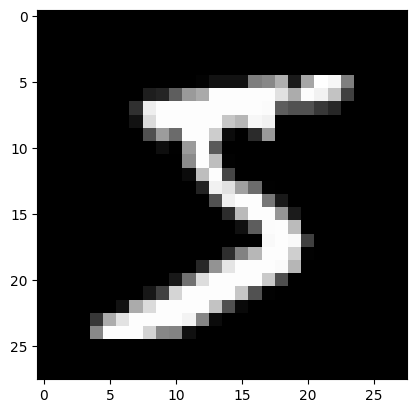

In [ ]:
plt.imshow(to_pil_image(train.data[0]), cmap="gray")

In [ ]:
train.targets[0]

tensor(5)

In [ ]:
train.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_loader = DataLoader(train, batch_size=100, shuffle=True)
test_loader = DataLoader(test, batch_size=100, shuffle=False)

In [ ]:
# MLP로 설계

input_size = 28*28 # 이미지 사이즈
hidden_sizes = [128, 64] # MLP 히든 레이어의 뉴런 개수 지정
output_size = 10 # 레이블 개수

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    # nn.LogSoftmax(dim=1)
    # 손실 함수로 CrossEntropyLoss를 쓴다면 굳이 쓸 필요없다.
    # nn.CrossEntropyLoss() == log_softmax + NLL loss, 이미 결합된 형태기 때문
    )

model.to(DEVICE)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# 손실함수 및 최적화 함수 지정
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.09)

In [ ]:
# 학습 진행
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in tqdm(train_loader):
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()

        #data to device
        labels = labels.to(DEVICE)
        images = images.to(DEVICE)

        # forward
        output = model(images)
        # loss
        loss = criterion(output, labels)
        # backward
        loss.backward()
        # optimization
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {e+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 0/10, Loss: 0.6333686961730322


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.25395339908699194


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 2/10, Loss: 0.18585065205271045


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 3/10, Loss: 0.14569430405274034


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 4/10, Loss: 0.11989453804368774


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 5/10, Loss: 0.10045294685599705


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 6/10, Loss: 0.08598782617443551


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 7/10, Loss: 0.07459599641151726


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 8/10, Loss: 0.06554412113968283


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch 9/10, Loss: 0.05881164840888232


In [ ]:
# 테스트
correct = 0
total = len(test)

# 모델을 추론모드로 변경 및 gradient 연산 끄기
# model.eval()
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        images = images.view(images.shape[0], -1)

        labels = labels.to(DEVICE)
        images = images.to(DEVICE)

        output = model(images)

        predictions = torch.argmax(output, dim=1)
        correct += torch.sum((predictions == labels).float())

print(f"Accuracy: {correct/total}")

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy: 0.9739999771118164
